# import library

In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as missno
%matplotlib inline

# load Data

In [511]:
df_train = pd.read_csv(r"C:\Users\USER_PC_SA\Desktop\train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv(r"C:\Users\USER_PC_SA\Desktop\test_Y3wMUE5_7gLdaTN.csv")

# simple look on the data

In [512]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [513]:
df_train.shape

(614, 13)

In [514]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [515]:
df_test.shape

(367, 12)

# separate the target and concat the data

In [516]:
target = df_train["Loan_Status"]
df_train.drop("Loan_Status" , inplace=True , axis=1)
target.shape

(614,)

In [517]:
my_data = pd.concat([df_train , df_test] , ignore_index=True)

In [518]:
my_data.shape

(981, 12)

In [519]:
my_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [520]:
my_data.info()  # We have missing data , we will handle them as we go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 92.1+ KB


In [521]:
# Describe the numerical data

my_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [522]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

my_data['Credit_History'] = my_data['Credit_History'].astype('O')

In [523]:
my_data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,981,957,978,956,981,926,902.0,981
unique,981,2,2,4,2,2,2.0,3
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban
freq,1,775,631,545,763,807,754.0,349


In [524]:
# we will drop ID because it's not important for our model and it will just mislead the model

my_data.drop('Loan_ID', axis=1, inplace=True)

In [525]:
data_columns = my_data.columns
data_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# missing value for each column

In [526]:
check_missing = my_data.isnull().sum()

In [527]:
miss_val = check_missing[check_missing>0]
miss_val

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

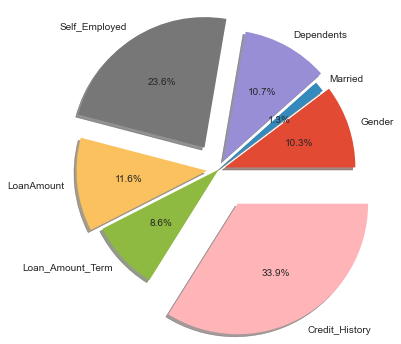

In [528]:
plt.figure(figsize=(10 , 6))
plt.pie(miss_val ,labels=data_columns[check_missing>0] , shadow=True , autopct="%1.1f%%" ,
        explode = [0.05 , 0.0 , 0.08 , 0.2 , 0.09 ,0.0 , 0.3 ] )
plt.show()


<AxesSubplot:>

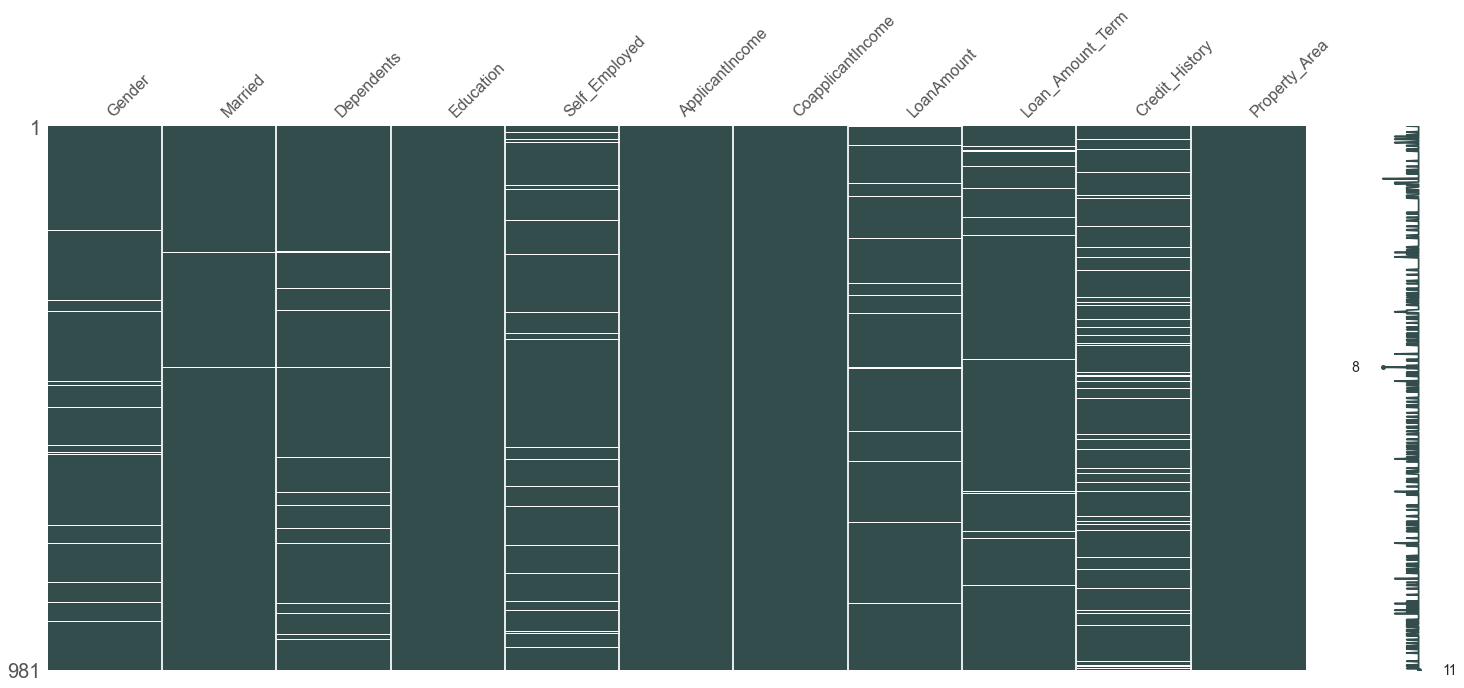

In [529]:
# It provides a colour fill for each column. When data is present,
# the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

missno.matrix(my_data , color=(0.2, 0.3, 0.3))

<AxesSubplot:>

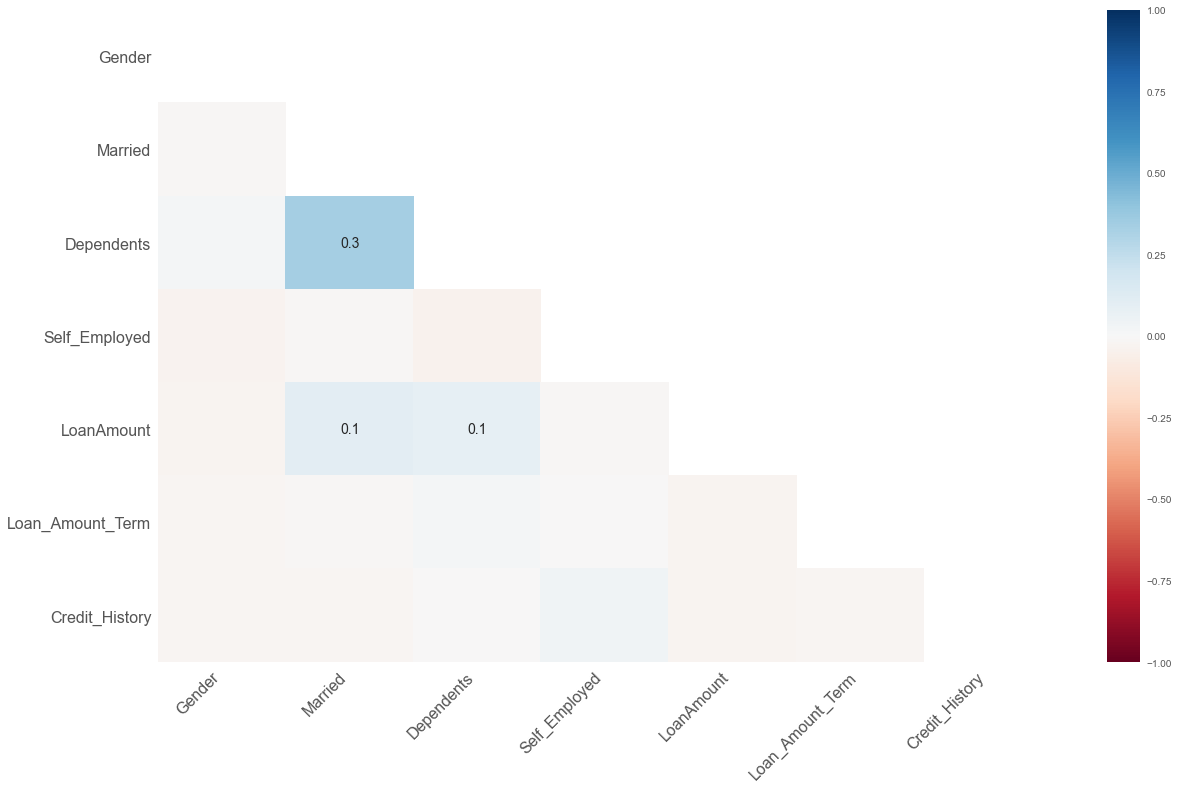

In [530]:
#identify correlations of the nullity between each of the different columns.
#In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

missno.heatmap(my_data)

In [531]:
# check the mode of all columns which have nan value 

for col_name in data_columns[check_missing>0]:
    print(f"the mode of {col_name} is .... {my_data[col_name].mode().values}")

the mode of Gender is .... ['Male']
the mode of Married is .... ['Yes']
the mode of Dependents is .... ['0']
the mode of Self_Employed is .... ['No']
the mode of LoanAmount is .... [120.]
the mode of Loan_Amount_Term is .... [360.]
the mode of Credit_History is .... [1.0]


In [532]:
# replace all nan value to it mode value

my_data["Gender"].fillna("Male" ,inplace=True )
my_data["Married"].fillna("Yes" ,inplace=True )
my_data["Dependents"].fillna("other" ,inplace=True )
my_data["Self_Employed"].fillna("NO" ,inplace=True )
my_data["LoanAmount"].fillna(120 ,inplace=True )
my_data["Loan_Amount_Term"].fillna(360 ,inplace=True )
my_data["Credit_History"].fillna(1 ,inplace=True )

In [533]:
my_data.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

<AxesSubplot:>

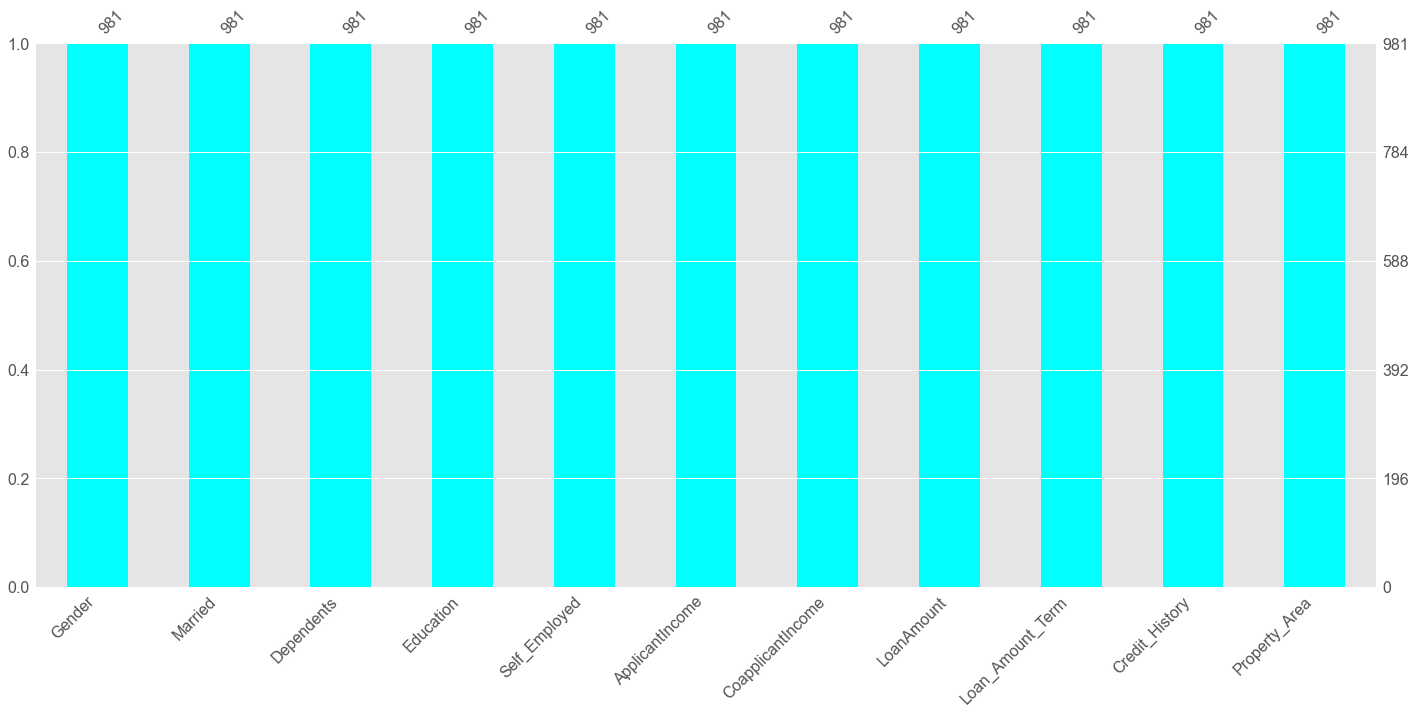

In [534]:
#The barplot provides a simple plot where each bar represents a column within the dataframe.
#The height of the bar indicates how complete that column is, i.e, how many non-null values are present.
#It can be generated by calling upon:

missno.bar(my_data , color='Cyan') # nan value not exist

# Exploratory Data Analysis

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


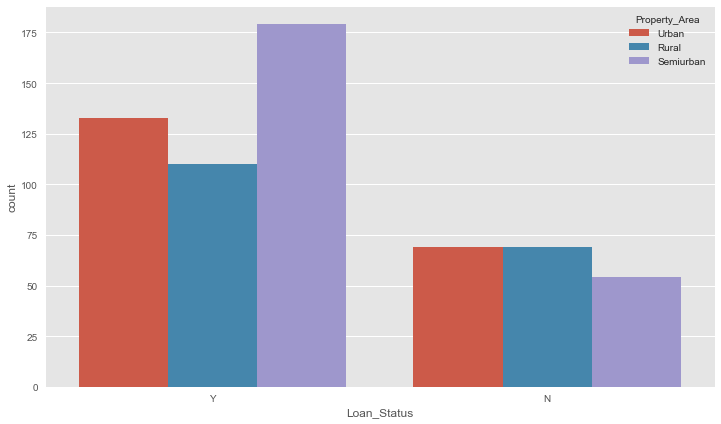

In [535]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue = my_data["Property_Area"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


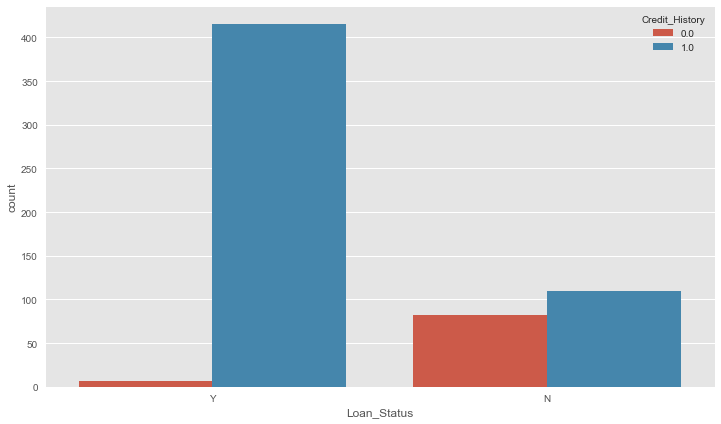

In [536]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue = my_data["Credit_History"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


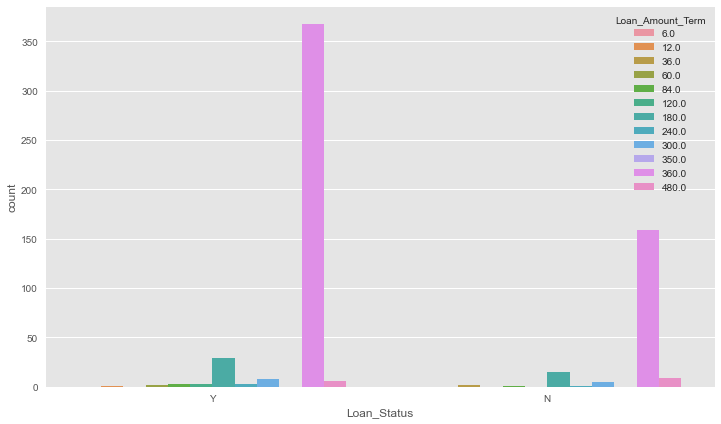

In [537]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue = my_data["Loan_Amount_Term"])
plt.show()

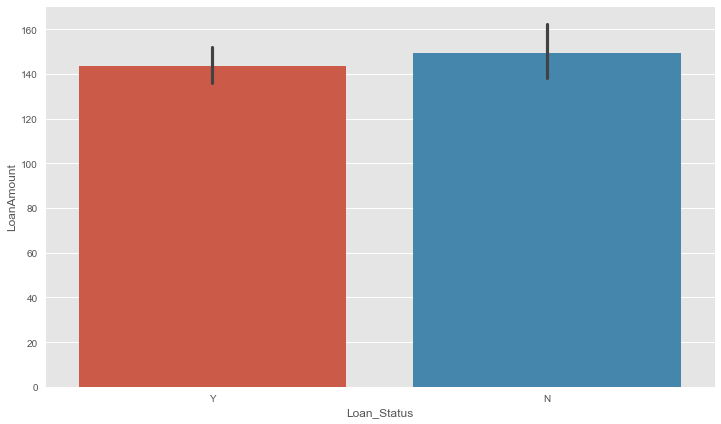

In [538]:
plt.figure(figsize=(12 , 7))
sns.barplot(x=target , y =my_data["LoanAmount"])
plt.show()

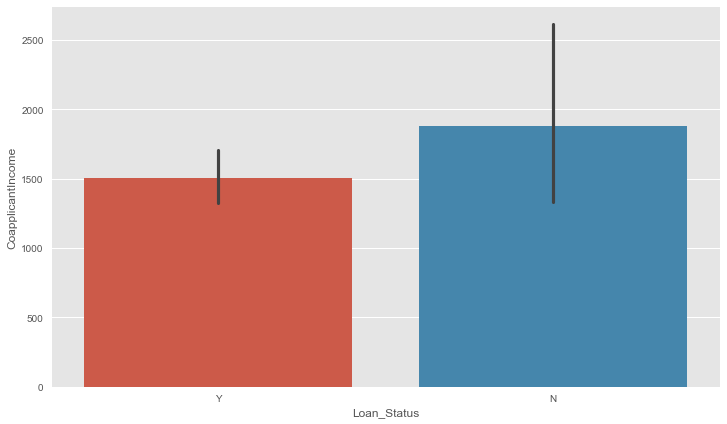

In [539]:
plt.figure(figsize=(12 , 7))
sns.barplot(x=target , y =my_data["CoapplicantIncome"])
plt.show()

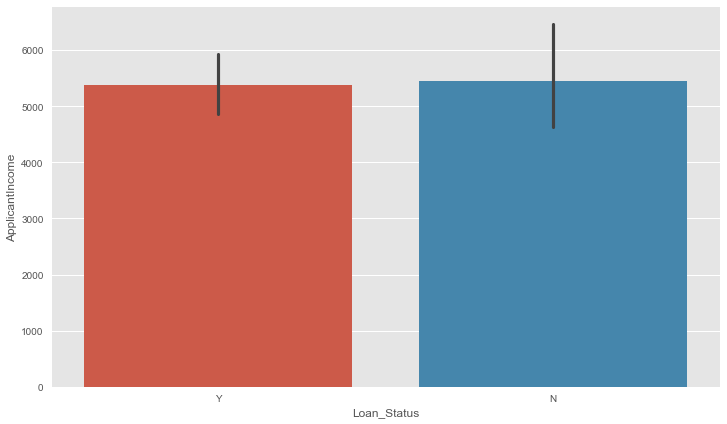

In [540]:
plt.figure(figsize=(12 , 7))
sns.barplot(x=target , y =my_data["ApplicantIncome"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


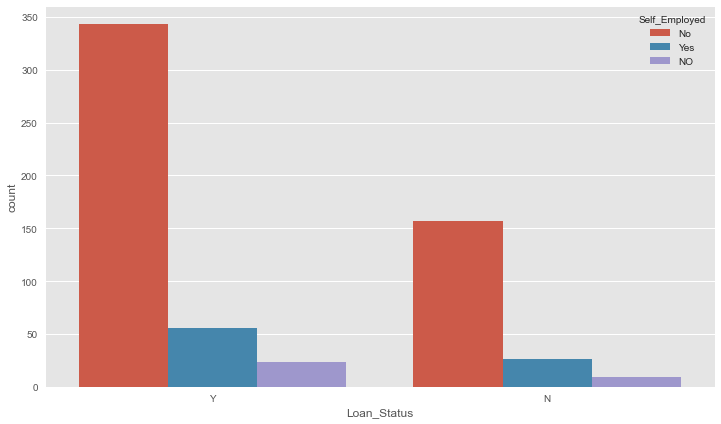

In [541]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue=my_data["Self_Employed"])
plt.show()

In [542]:
my_data["Self_Employed"].replace("No" , "NO" , inplace=True)

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


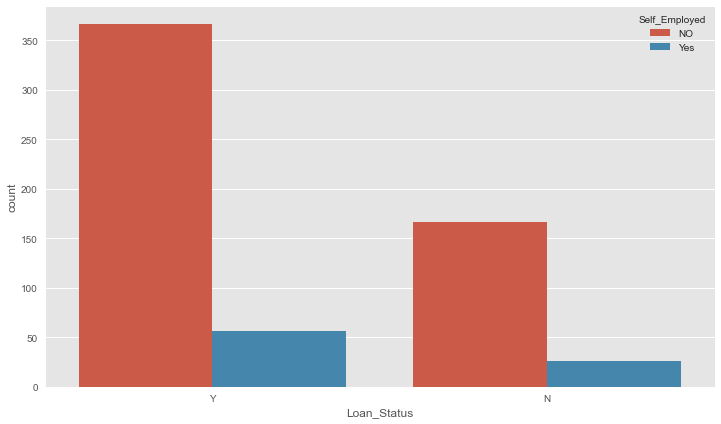

In [543]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue=my_data["Self_Employed"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


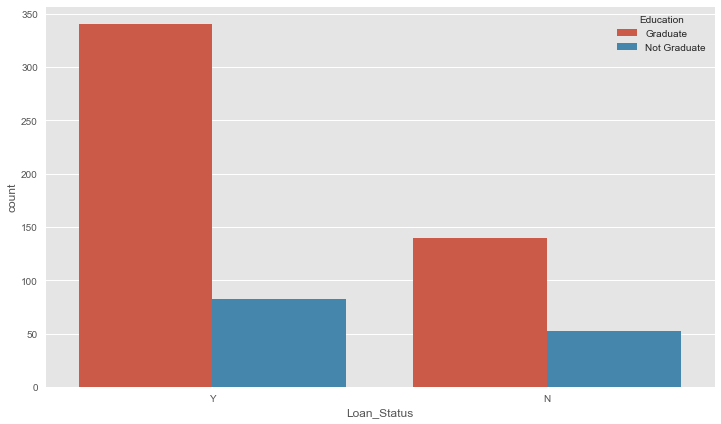

In [544]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue=my_data["Education"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


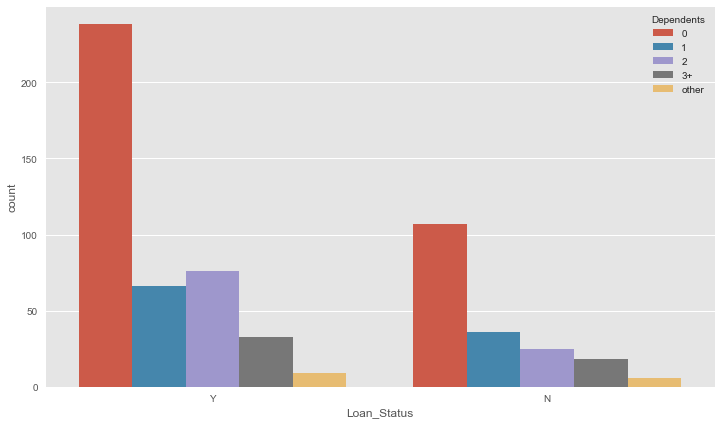

In [545]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue=my_data["Dependents"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


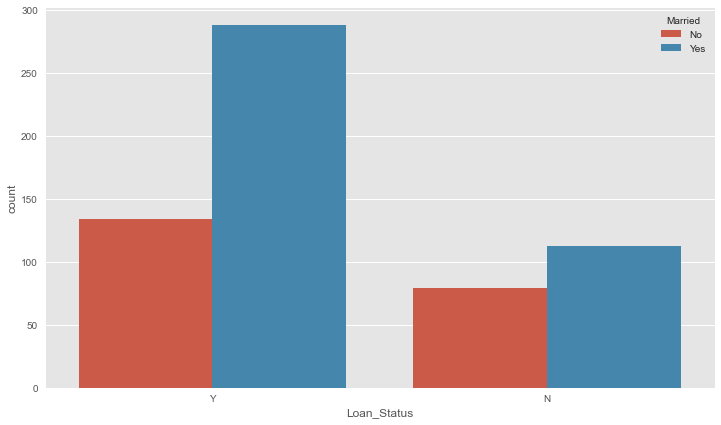

In [546]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue=my_data["Married"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


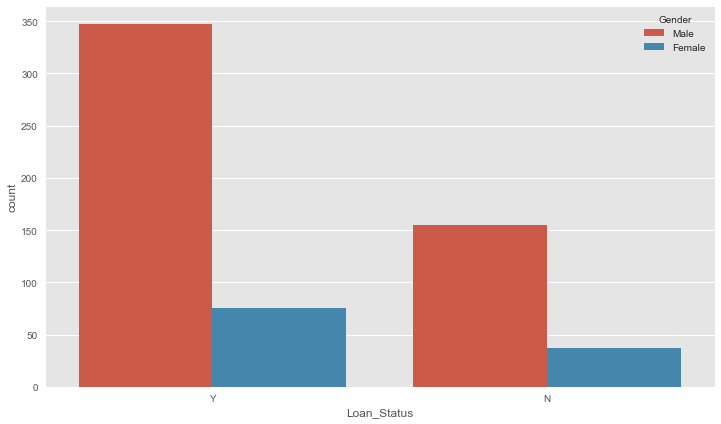

In [547]:
plt.figure(figsize=(12 , 7))
sns.countplot(target , hue=my_data["Gender"])
plt.show()

# data preprocess

In [551]:
my_data.nunique()

Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [554]:
col_nu = my_data.columns[my_data.nunique()<13]
col_nu

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [555]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for co_name in col_nu:
    my_data[co_name] = label_enc.fit_transform(my_data[co_name])
    print(f"column name is << {co_name} >> , and it's labelencoder is ...... {my_data[co_name].unique()}")

column name is << Gender >> , and it's labelencoder is ...... [1 0]
column name is << Married >> , and it's labelencoder is ...... [0 1]
column name is << Dependents >> , and it's labelencoder is ...... [0 1 2 3 4]
column name is << Education >> , and it's labelencoder is ...... [0 1]
column name is << Self_Employed >> , and it's labelencoder is ...... [0 1]
column name is << Loan_Amount_Term >> , and it's labelencoder is ...... [10  5  7  6  3  8 11  2  4  1  9  0]
column name is << Credit_History >> , and it's labelencoder is ...... [1 0]
column name is << Property_Area >> , and it's labelencoder is ...... [2 0 1]


In [560]:
target = label_enc.fit_transform(target)
target[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

# check the outlier

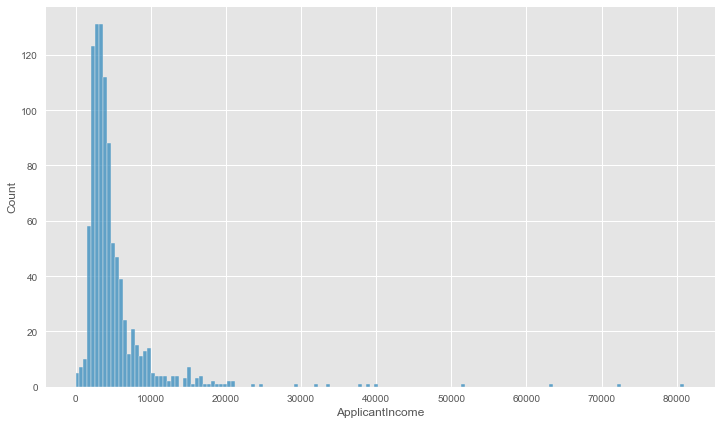

In [561]:
plt.figure(figsize=(12 , 7))
sns.histplot(my_data["ApplicantIncome"] )
plt.show()

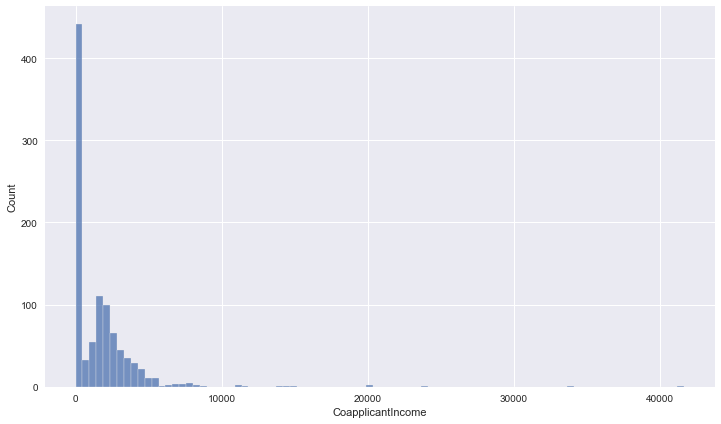

In [562]:
plt.style.use("seaborn")
plt.figure(figsize=(12 , 7))
sns.histplot(my_data["CoapplicantIncome"] )
plt.show()

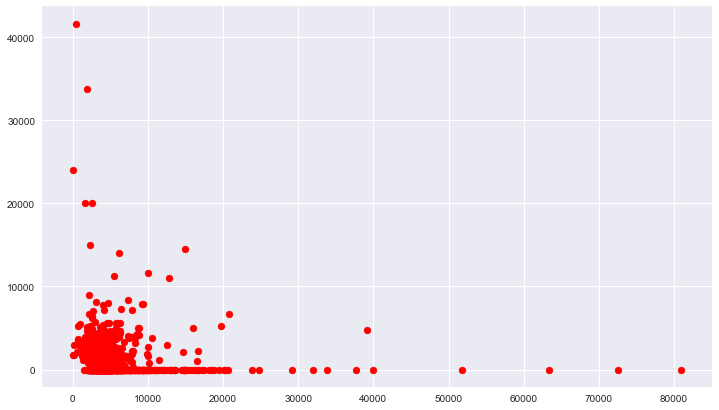

In [563]:
plt.style.use("seaborn")
plt.figure(figsize=(12 , 7))
plt.scatter(my_data["ApplicantIncome"]  , my_data["CoapplicantIncome"] ,c="r" )
plt.show()

In [564]:
index_outlier = my_data["ApplicantIncome"][my_data["ApplicantIncome"] > 30000].index
index_outlier

Int64Index([155, 171, 183, 185, 333, 409, 443, 695, 757], dtype='int64')

In [565]:
my_data.drop(index=index_outlier , axis=0 , inplace=True)

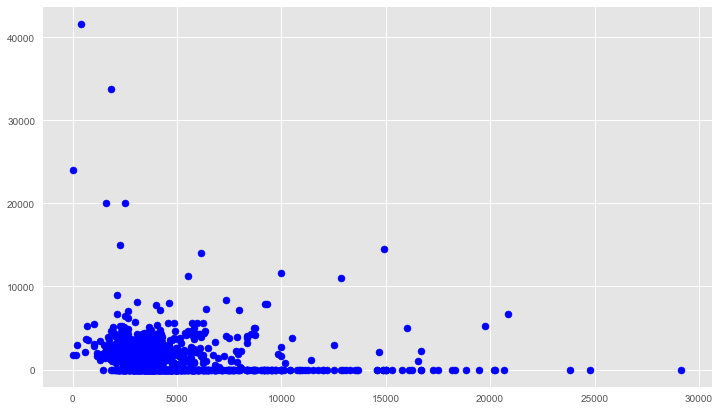

In [566]:
plt.style.use("ggplot")
plt.figure(figsize=(12 , 7))
plt.scatter(my_data["ApplicantIncome"]  , my_data["CoapplicantIncome"] ,c="b" )
plt.show()

In [567]:
my_data.shape

(972, 11)

In [568]:
target.shape

(614,)

In [570]:
x_train = my_data[ : 614]
x_train.shape

(614, 11)

In [571]:
x_test = my_data[615 : ]
x_test.shape

(357, 11)

# Machine Learning Model

In [681]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , accuracy_score

In [723]:
log_model = LogisticRegression(penalty='l2',tol=0.01,C=0.01,random_state=44,solver='saga',max_iter=100)

In [724]:
log_model.fit(x_train , target)

LogisticRegression(C=0.01, random_state=44, solver='saga', tol=0.01)

In [725]:
log_model.score(x_train , target)

0.6872964169381107

In [726]:
svc_model = SVC(C=5 , tol=1)

In [727]:
svc_model.fit(x_train , target)

SVC(C=5, tol=1)

In [728]:
svc_model.score(x_train , target)

0.7003257328990228

In [661]:
from lazypredict.Supervised import LazyClassifier

In [662]:
clf = LazyClassifier()

In [669]:
 clf.fit(x_train , x_test , target  , pred)

  3%|██▊                                                                                | 1/29 [00:00<00:02,  9.82it/s]

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


C:\Users\USER_PC_SA\anaconda1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER_PC_SA\anaconda1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER_PC_SA\anaconda1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER_PC_SA\anaconda1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER_PC_SA\anaconda1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 SGDClassifier                      0.70               0.85     0.85      0.82   
 BaggingClassifier                  0.76               0.72     0.72      0.86   
 DecisionTreeClassifier             0.70               0.68     0.68      0.81   
 LinearSVC                          0.97               0.66     0.66      0.98   
 RidgeClassifierCV                  0.97               0.66     0.66      0.98   
 RidgeClassifier                    0.97               0.66     0.66      0.98   
 LogisticRegression                 0.97               0.65     0.65      0.98   
 LinearDiscriminantAnalysis         0.96               0.65     0.65      0.97   
 NuSVC                              0.86               0.60     0.60      0.92   
 QuadraticDiscriminantAnalysis      0.84               0.59     0.59      0.91   
 LGBMClassifier 